In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
# Replace with the path where you downloaded the data from data.gouv.fr
fn = "/home/dtrckd/Downloads/covid-hospit-2023-03-31-18h01.csv" # https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd
fn_meta = "/home/dtrckd/Downloads/metadonnees-donnees-hospitalieres-covid19-maj20210810.csv" # https://www.data.gouv.fr/fr/datasets/r/3f0f1885-25f4-4102-bbab-edec5a58e34a 

# Load and show the meta data table
df_meta = pd.read_csv(fn_meta, delimiter=";", encoding="latin-1")
# Solve the encoding issue: Re-encode the french string to utf-8, 
df_meta["Description_FR"] = df_meta["Description_FR"].apply(lambda x: x.encode('latin-1', errors="ignore").decode('utf-8', errors="ignore"))
print("Meta data")
display(HTML(df_meta.to_html()))

# Metadata - sexe
#0: femmes + hommes                                                                                                                                                                                      
#1: hommes                                                                                                                                                                                                  
#2: femmes

# Load and show the per region data  table
df =  pd.read_csv(fn, delimiter=";")
df.head(20)

Meta data


,Colonne,Type,Description_FR,Description_EN,Exemple
0,dep,integer,Département,Department,1
1,sexe,integer,Sexe,Sex,0
2,jour,string($date),Date de notification,Date of notice,18/03/2020
3,hosp,integer,Nombre de personnes actuellement hospitalises,Number of people currently hospitalized,2
4,rea,integer,Nombre de personnes actuellement en services de ranimation ou soins intensifs,Number of people currently in resuscitation or critical care,0
5,rad,integer,Nombre cumul de personnes retournes domicile,Total amount of patient that returned home,1
6,dc,integer,Nombre cumul de personnes dcdes l'hpital,Total amout of deaths at the hospital,0
7,ssr_usld,integer,Nombre de personnes actuellement en services de SSR ou USLD,NaN,NaN
8,hospconv,integer,Nombre de personnes actuellement en services d'hospitalisation conventionnelle,NaN,NaN
9,autres,integer,Nombre de personnes actuellement en autres types de services,NaN,NaN


,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,01,0,2020-03-18,2,0,NaN,NaN,NaN,1,0
1,01,1,2020-03-18,1,0,NaN,NaN,NaN,1,0
2,01,2,2020-03-18,1,0,NaN,NaN,NaN,0,0
3,02,0,2020-03-18,41,10,NaN,NaN,NaN,18,11
4,02,1,2020-03-18,19,4,NaN,NaN,NaN,11,6
5,02,2,2020-03-18,22,6,NaN,NaN,NaN,7,5
6,03,0,2020-03-18,4,0,NaN,NaN,NaN,1,0
7,03,1,2020-03-18,1,0,NaN,NaN,NaN,0,0
8,03,2,2020-03-18,3,0,NaN,NaN,NaN,1,0
9,04,0,2020-03-18,3,1,NaN,NaN,NaN,2,0


In [4]:
# Group and sum the data per region to obtain the data for the whole country !
reduced_df = df.groupby(['jour', 'sexe'])[["hosp", "rea", "rad", "dc"]].sum()
reduced_df

hosp   rea     rad      dc
jour       sexe                             
2020-03-18 0      2972   771     816     218
           1      1685   525     432     121
           2      1248   239     379      96
2020-03-19 0      4073  1002    1180     327
           1      2256   689     580     179
...                ...   ...     ...     ...
2023-03-30 1      5953   459  421833   77609
           2      7003   267  433447   57376
2023-03-31 0     13149   709  863837  136076
           1      5919   446  422089   77630
           2      6997   258  433693   57385

[3327 rows x 4 columns]

In [5]:
# Make the shape of he table more convenient
reduced_df = reduced_df.unstack()
reduced_df

hosp               rea                rad                  \
sexe            0     1     2     0     1    2       0       1       2   
jour                                                                     
2020-03-18   2972  1685  1248   771   525  239     816     432     379   
2020-03-19   4073  2256  1632  1002   689  284    1180     580     562   
2020-03-20   5226  2912  2134  1297   905  362    1587     777     764   
2020-03-21   5900  3298  2401  1453  1018  401    1811     881     888   
2020-03-22   6954  3906  2815  1674  1176  461    2117    1031    1040   
...           ...   ...   ...   ...   ...  ...     ...     ...     ...   
2023-03-27  13113  5950  6923   728   457  263  861972  421189  432745   
2023-03-28  13178  6000  6943   720   452  261  862458  421407  433007   
2023-03-29  13184  5989  6964   734   456  270  862962  421645  433268   
2023-03-30  13186  5953  7003   732   459  267  863331  421833  433447   
2023-03-31  13149  5919  6997   709   446  258  863837  422089  433693   

                dc                
sexe             0      1      2  
jour                              
2020-03-18     218    121     96  
2020-03-19     327    179    136  
2020-03-20     450    250    190  
2020-03-21     525    297    219  
2020-03-22     632    356    263  
...            ...    ...    ...  
2023-03-27  135936  77555  57324  
2023-03-28  135975  77575  57342  
2023-03-29  136009  77594  57356  
2023-03-30  136045  77609  57376  
2023-03-31  136076  77630  57385  

[1109 rows x 12 columns]

In [17]:
# Work with dates.
# - Show start, end and number of days of the period of time.
df = reduced_df
dates = pd.to_datetime(df.index)
#dates = dates.apply(pd.to_datetime) -> if dates is a series/columns ofo the dataframe
date_range = dates.max() - dates.min()
n_jour = date_range.days + 1

print(f'''
Nombre de jour totaux: {n_jour} 
Debut: {dates.min()}
Fin: {dates.max()}
''')


Nombre de jour totaux: 1109 
Debut: 2020-03-18 00:00:00
Fin: 2023-03-31 00:00:00



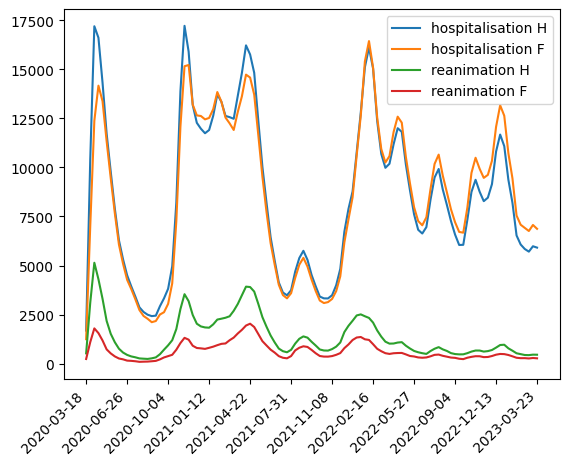

In [130]:
# Plot the temporal data (hospitalisation and reanimation)
# Slices the data to plot faster. Every 10th day is enough to see data over a two year span!
plt.plot(reduced_df["hosp"][1][::10], label="hospitalisation H")
plt.plot(reduced_df["hosp"][2][::10], label="hospitalisation F")
plt.plot(reduced_df["rea"][1][::10], label="reanimation H")
plt.plot(reduced_df["rea"][2][::10], label="reanimation F")
plt.xticks(reduced_df.index[::100]) # reduce the number of xtick to make it readable !
plt.xticks(rotation=45, horizontalalignment='right')  # Rotate xtick labels for better readability !
plt.legend()
plt.show()

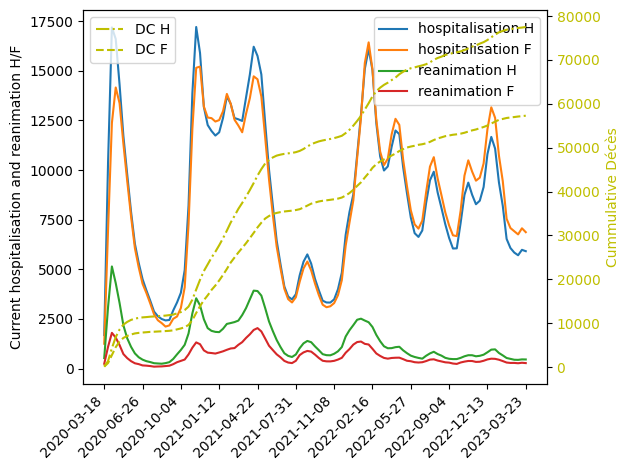

In [140]:
# Plot the cummulative of deatch along with the temporal data, 
# but on different y-axis (right axis)

# Use twinx Add to add the cummulate dc on the curve
fig, ax1 = plt.subplots()

# Current hosp and rea
ax1.set_ylabel('Current hospitalisation and reanimation H/F')
ax1.plot(reduced_df["hosp"][1][::10], label="hospitalisation H")
ax1.plot(reduced_df["hosp"][2][::10], label="hospitalisation F")
ax1.plot(reduced_df["rea"][1][::10], label="reanimation H")
ax1.plot(reduced_df["rea"][2][::10], label="reanimation F")
ax1.legend()

# Cummulative DC
ax2 = ax1.twinx()  # instantiate a second axes that shares the csame x-axis
color = "y"
ax2.set_ylabel('Cummulative Décès', color=color)  # we already handled the x-label with ax1
ax2.plot(reduced_df["dc"][1][::10], "-.", color=color, label="DC H")
ax2.plot(reduced_df["dc"][2][::10], "--", color=color, label="DC F")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()


# xticks | # reduce the number of xtick to make it readable !
ax1.set_xticks(reduced_df.index[::100]) 
ax2.set_xticks(reduced_df.index[::100]) 
plt.setp(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [143]:
# Save the reduce table for later usage
reduced_df.to_csv("reduced_covid_sexe.csv")

In [5]:
# Hey, it doens't have has the same shape that the original saved table. There should be a magical method to change that...to see.
td = pd.read_csv("reduced_covid_sexe.csv")
td

,Unnamed: 0,hosp,hosp.1,hosp.2,rea,rea.1,rea.2,rad,rad.1,rad.2,dc,dc.1,dc.2
0,sexe,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0
1,jour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-18,2972.0,1685.0,1248.0,771.0,525.0,239.0,816.0,432.0,379.0,218.0,121.0,96.0
3,2020-03-19,4073.0,2256.0,1632.0,1002.0,689.0,284.0,1180.0,580.0,562.0,327.0,179.0,136.0
4,2020-03-20,5226.0,2912.0,2134.0,1297.0,905.0,362.0,1587.0,777.0,764.0,450.0,250.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2023-03-27,13113.0,5950.0,6923.0,728.0,457.0,263.0,861972.0,421189.0,432745.0,135936.0,77555.0,57324.0
1107,2023-03-28,13178.0,6000.0,6943.0,720.0,452.0,261.0,862458.0,421407.0,433007.0,135975.0,77575.0,57342.0
1108,2023-03-29,13184.0,5989.0,6964.0,734.0,456.0,270.0,862962.0,421645.0,433268.0,136009.0,77594.0,57356.0
1109,2023-03-30,13186.0,5953.0,7003.0,732.0,459.0,267.0,863331.0,421833.0,433447.0,136045.0,77609.0,57376.0


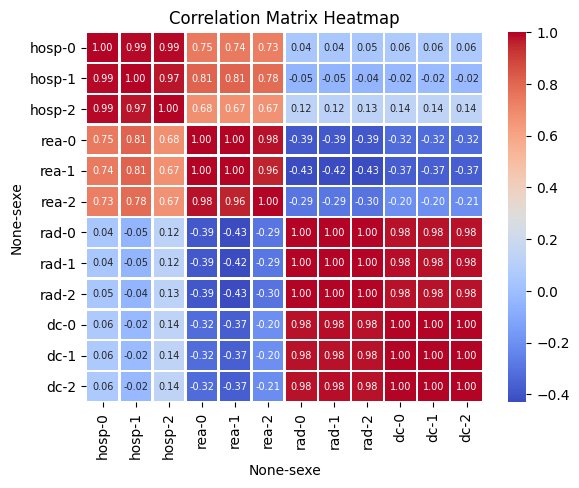

In [35]:
import seaborn as sns

# Create a heatmap using seaborn and round the annotated numbers to 2 floating point only
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1, fmt=".2f", annot_kws={"size": 7})                                                                                                                                                         
plt.title('Correlation Matrix Heatmap')  
plt.show()

# - We can see that male and femala data are extremely correlated, meaning that the covid is not completely sexcist event of killed more man than woman.
# - Unsurprisingly, temporal data (hosp, rad) are hihly correlated, likely for cummultive data (rad, dc).  

In [3]:
# Never forget to read the doc to learn more on a function ! 
# You can do like this on Jupyter.
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,